In [ ]:
import numpy as np
from numba.typed import List as NumbaList
from BPmodule.BPGen  import PROBLEM2,PROBLEM3,PROBLEM4,PROBLEM5
from BPnumba.GeneticOperators import CreatePoblation,InstancePob
from BPnumba.DFFA import DFFtrain, DFFA,createDFFA
import matplotlib.pyplot as plt


In [ ]:
P2A1 = PROBLEM2[0]
P2A2 = PROBLEM2[1]
P3A1 = PROBLEM3[0]
P3A2 = PROBLEM3[1]
P4A1 = PROBLEM4[0]
P4A2 = PROBLEM4[1]
P5A1 = PROBLEM5[0]
P5A2 = PROBLEM5[1]
pop=26
contenedor =np.array( P2A1[0],dtype=np.int64)
datos =np.array(P2A1[1],dtype=np.int64)
idBoxes = np.arange(1,len(datos)+1,dtype=np.int64)
initial = CreatePoblation(pop,idBoxes)
n= len(datos)
gamma= 1/n
maxItr=500

In [ ]:
Pob = InstancePob(initial,datos,contenedor)

In [ ]:
dffa = createDFFA(pop,gamma)

In [5]:
dffa.Train(maxItr,Pob,datos,contenedor)

In [6]:
dffa.BestInd.fi

1.0

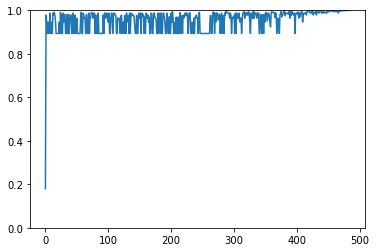

In [7]:
plt.figure()
plt.plot(dffa.bestfi)
plt.ylim(0,1)
plt.show()